In [1]:
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [114]:
env = gym.make('BasketBall-v0', s=7.25, h=1.8)

D:\Anaconda3\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [115]:
print(env.observation_space.sample())

[6.9161973]


In [116]:
episodes = 100
env_scores = []
for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        # env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
    env_scores.append(score)
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:56
Episode:2 Score:60
Episode:3 Score:-60
Episode:4 Score:42
Episode:5 Score:-56
Episode:6 Score:-60
Episode:7 Score:-60
Episode:8 Score:-60
Episode:9 Score:-60
Episode:10 Score:-60
Episode:11 Score:-60
Episode:12 Score:-60
Episode:13 Score:-60
Episode:14 Score:-24
Episode:15 Score:-60
Episode:16 Score:-16
Episode:17 Score:-34
Episode:18 Score:60
Episode:19 Score:60
Episode:20 Score:-60
Episode:21 Score:60
Episode:22 Score:-60
Episode:23 Score:-60
Episode:24 Score:60
Episode:25 Score:-60
Episode:26 Score:60
Episode:27 Score:-60
Episode:28 Score:-60
Episode:29 Score:-34
Episode:30 Score:60
Episode:31 Score:-58
Episode:32 Score:-60
Episode:33 Score:14
Episode:34 Score:-60
Episode:35 Score:-60
Episode:36 Score:60
Episode:37 Score:-60
Episode:38 Score:-60
Episode:39 Score:-60
Episode:40 Score:-60
Episode:41 Score:-60
Episode:42 Score:-60
Episode:43 Score:-60
Episode:44 Score:-60
Episode:45 Score:48
Episode:46 Score:-60
Episode:47 Score:-60
Episode:48 Score:-60
Episode:49 Sc

In [86]:
env_scores

[-50,
 -60,
 -60,
 0,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 60,
 -60,
 42,
 -60,
 44,
 60,
 8,
 -56,
 -60,
 -60,
 -60,
 -60,
 -60,
 60,
 -18,
 -60,
 -60,
 42,
 -60,
 -60,
 -18,
 -38,
 -60,
 -60,
 -6,
 -24,
 -14,
 -60,
 -60,
 -60,
 -12,
 -60,
 60,
 -60,
 -60,
 -60,
 -44,
 -60,
 -60,
 -60,
 -60,
 60,
 -60,
 -44,
 -60,
 -60,
 -60,
 -4,
 58,
 -60,
 -60,
 -60,
 -60,
 -60,
 60,
 -60,
 2,
 60,
 -28,
 38,
 38,
 -60,
 60,
 60,
 60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -60,
 -14,
 -60,
 -60,
 -60,
 -22,
 -60,
 54,
 -60,
 -60,
 60,
 -60,
 22]

In [101]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [117]:
states = env.observation_space.shape
actions = env.action_space.n

In [118]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [119]:
del model 

In [120]:
model = build_model(states, actions)

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                48        
_________________________________________________________________
dense_16 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 75        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [76]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [122]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [123]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 22:16 - reward: -1.0000

D:\Anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 67s 7ms/step - reward: -0.2270
166 episodes - episode_reward: -13.434 [-60.000, 60.000] - loss: 0.558 - mae: 2.542 - mean_q: -3.227

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 63s 6ms/step - reward: -0.3358
167 episodes - episode_reward: -20.228 [-60.000, 60.000] - loss: 0.831 - mae: 4.758 - mean_q: -6.532

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 67s 7ms/step - reward: -0.3080
167 episodes - episode_reward: -18.563 [-60.000, 60.000] - loss: 1.105 - mae: 6.255 - mean_q: -8.755

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 71s 7ms/step - reward: -0.3372
166 episodes - episode_reward: -20.072 [-60.000, 60.000] - loss: 1.135 - mae: 6.380 - mean_q: -8.940

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: -0.3828
167 episodes - episode_reward: -23.042 [-60.000, 60.000] - los

In [124]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 28.000, steps: 60
Episode 2: reward: 60.000, steps: 60
Episode 3: reward: 38.000, steps: 60
Episode 4: reward: 36.000, steps: 60
Episode 5: reward: 30.000, steps: 60
Episode 6: reward: 50.000, steps: 60
Episode 7: reward: 52.000, steps: 60
Episode 8: reward: 60.000, steps: 60
Episode 9: reward: 60.000, steps: 60
Episode 10: reward: 52.000, steps: 60
Episode 11: reward: 34.000, steps: 60
Episode 12: reward: 38.000, steps: 60
Episode 13: reward: 30.000, steps: 60
Episode 14: reward: 60.000, steps: 60
Episode 15: reward: 36.000, steps: 60
Episode 16: reward: 52.000, steps: 60
Episode 17: reward: 50.000, steps: 60
Episode 18: reward: 60.000, steps: 60
Episode 19: reward: 54.000, steps: 60
Episode 20: reward: 28.000, steps: 60
Episode 21: reward: 48.000, steps: 60
Episode 22: reward: 60.000, steps: 60
Episode 23: reward: 54.000, steps: 60
Episode 24: reward: 50.000, steps: 60
Episode 25: reward: 30.000, steps: 60
Episode 26: reward: 60.000, st

In [125]:
dqn_scores = scores.history['episode_reward']

In [126]:
import matplotlib.pyplot as plt
from pylab import * 

Text(0.5,1,'Result 4')

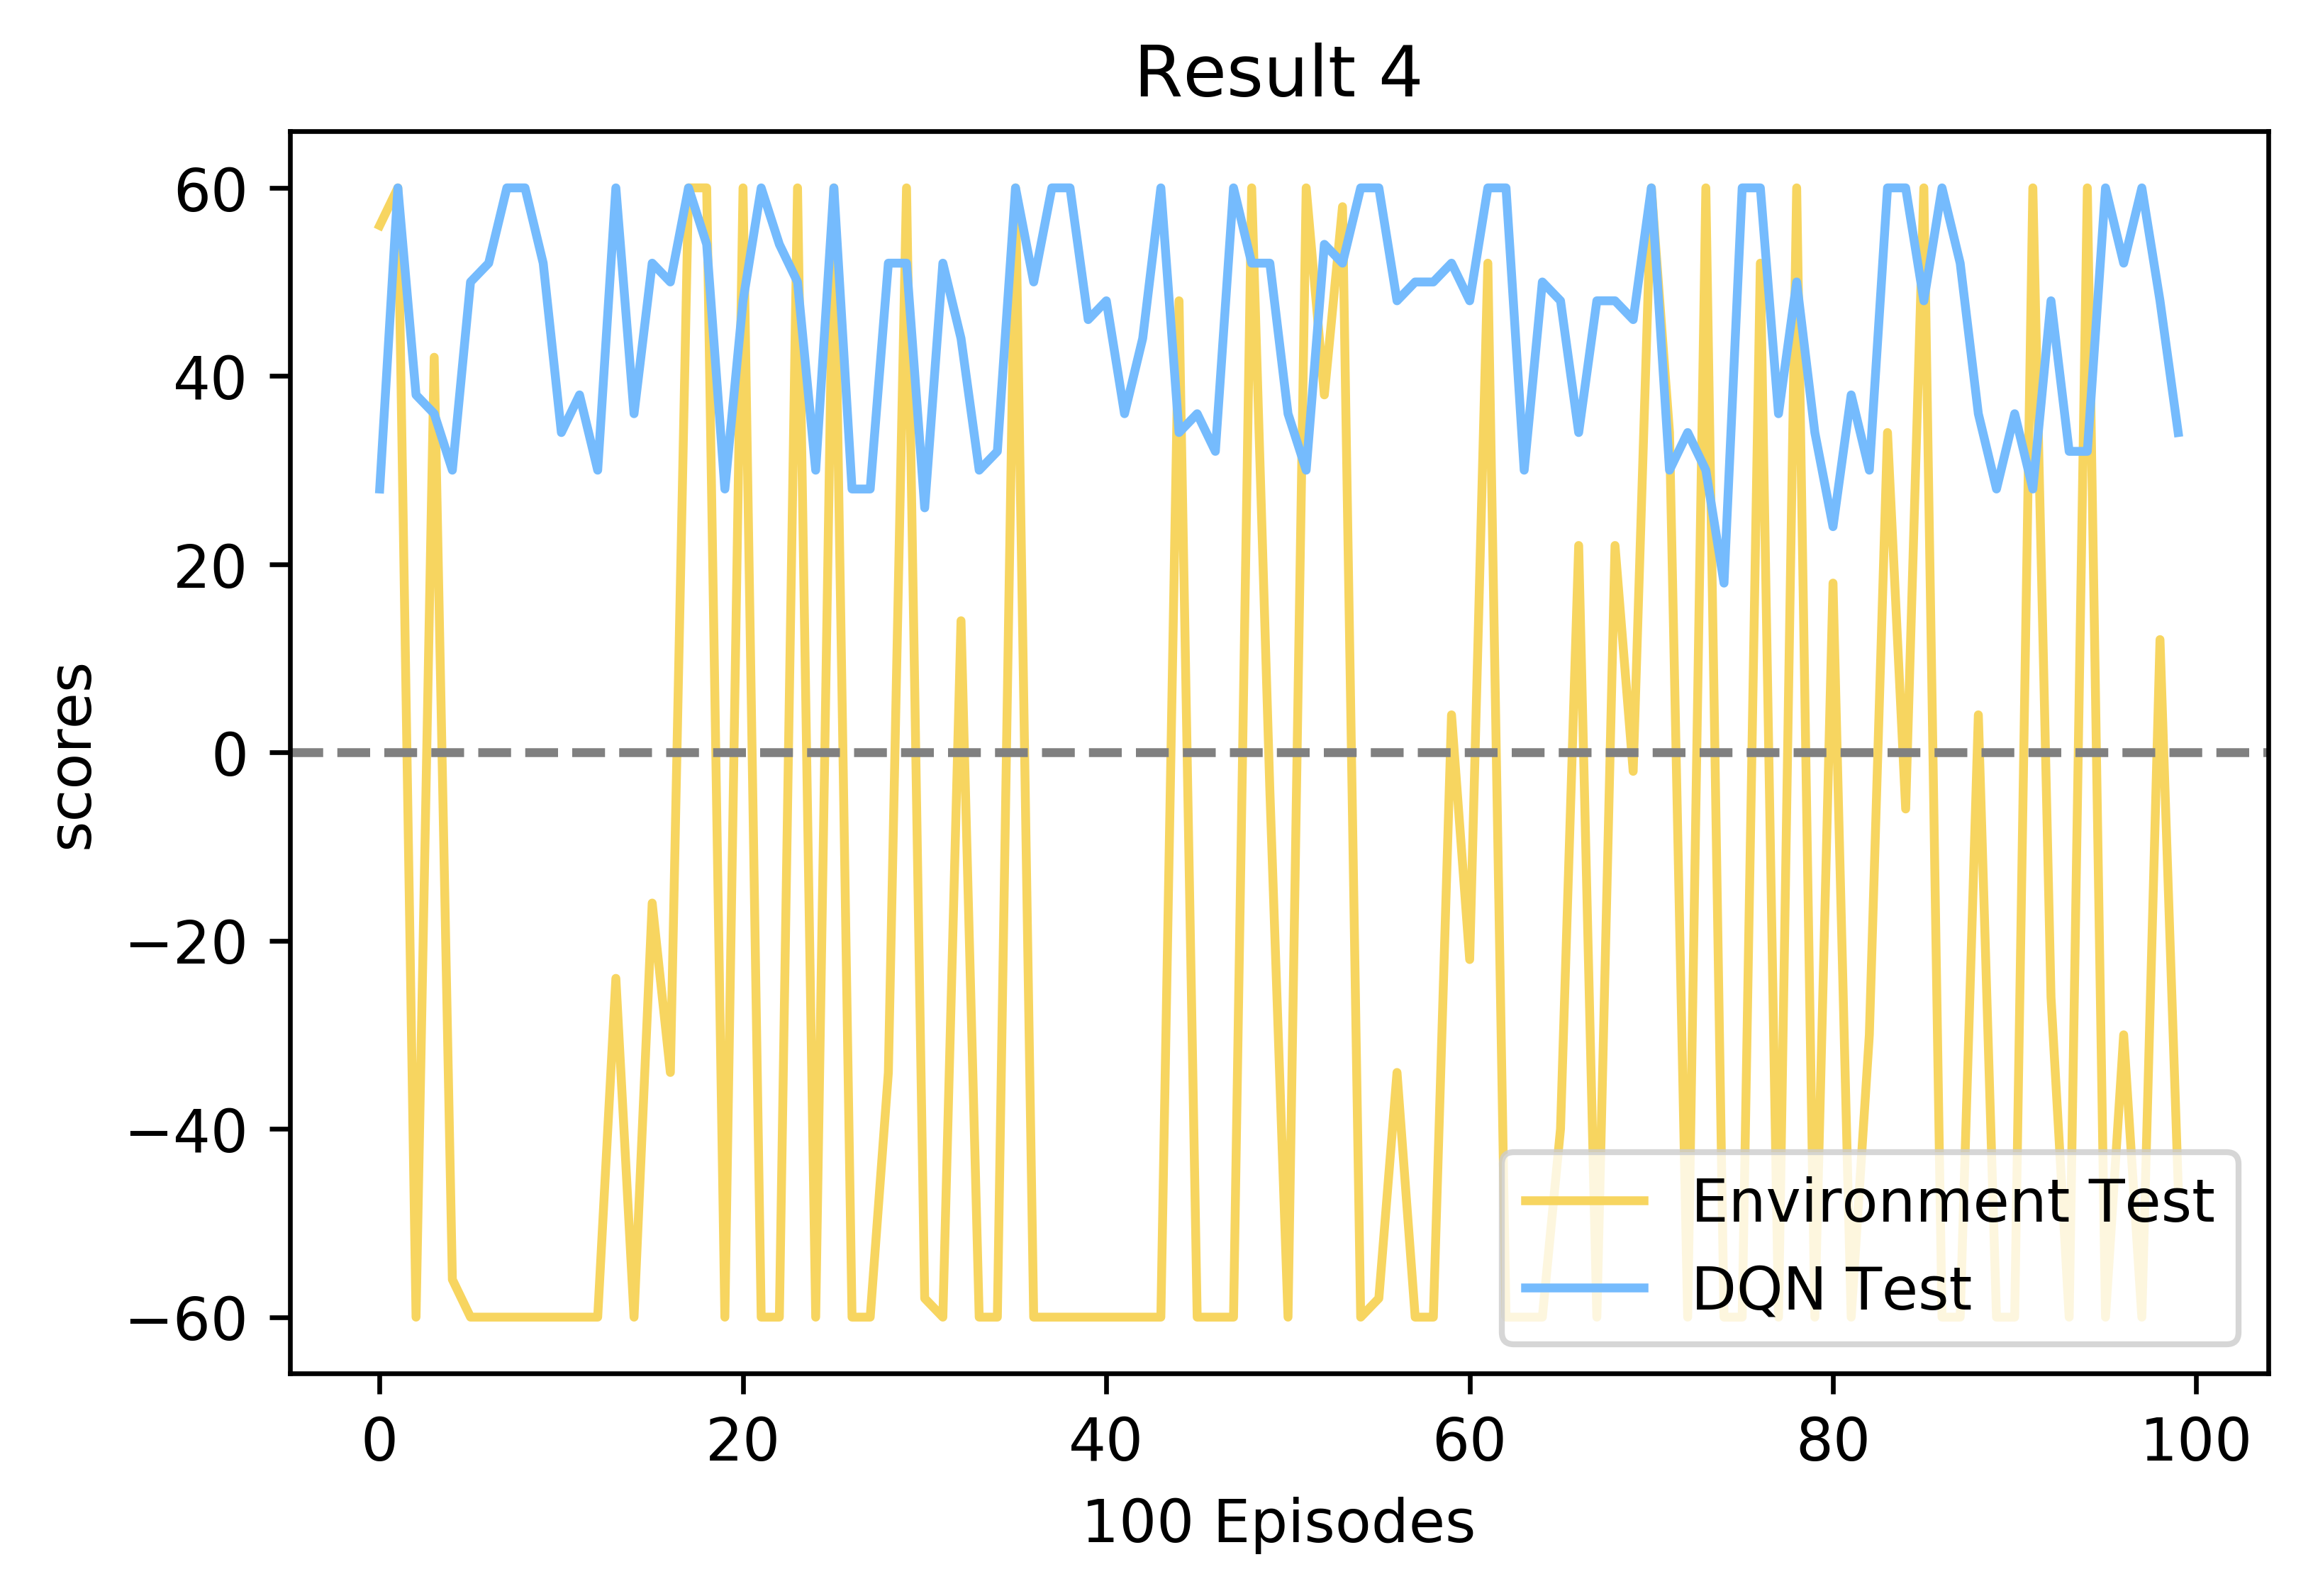

In [127]:
x = range(100)
plt.figure(dpi=600)
plt.plot(x, env_scores, color='#f7d560', label='Environment Test')
plt.plot(x, dqn_scores, color='#75bbfd', label='DQN Test')
plt.axhline(y=0,ls="--",c="grey")
plt.legend(loc='lower right')
#plt.xticks(x, names, rotation=45)
#plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel('100 Episodes') #X轴标签
plt.ylabel("scores") #Y轴标签
plt.title("Result 4") #标题
#plt.savefig("result.jpg",dpi = 600)
